In [8]:
import csv
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
madelon_file ='madelon_train.csv'
madelon_data = []        

with open(madelon_file) as f:
    readcsv = csv.reader(f, delimiter=' ')
    
    for row in readcsv:
        madelon_data.append(row)

In [10]:
madelon_file_target ='madelon_train_targets.csv'
madelon_data_target = []        

with open(madelon_file_target) as f:
    readcsv = csv.reader(f, delimiter=' ')
    
    for row in readcsv:
        madelon_data_target.append(row)

In [23]:
#Sample 10% of data set

In [24]:
#madelon_data[0:3]

In [25]:
madelon_data_df = pd.DataFrame(madelon_data)

In [1]:
madelon_targets_df = pd.DataFrame(madelon_data_target)
#madelon_targets_df.head()

NameError: name 'pd' is not defined

In [27]:
X = madelon_data_df
y = madelon_targets_df

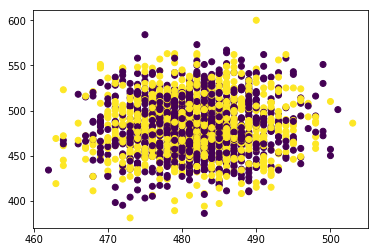

In [28]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y)

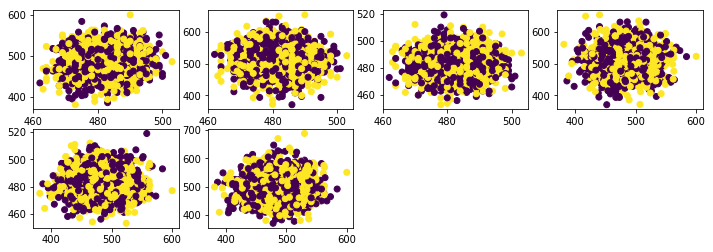

In [29]:
fig = plt.figure(figsize=(12,4))
fig.add_subplot(2,4,1)
plt.scatter(X.iloc[:,0],X.iloc[:,1], c=y)
fig.add_subplot(2,4,2)
plt.scatter(X.iloc[:,0],X.iloc[:,2], c=y)
fig.add_subplot(2,4,3)
plt.scatter(X.iloc[:,0],X.iloc[:,3], c=y)
fig.add_subplot(2,4,4)
plt.scatter(X.iloc[:,1],X.iloc[:,2], c=y)
fig.add_subplot(2,4,5)
plt.scatter(X.iloc[:,1],X.iloc[:,3], c=y)
fig.add_subplot(2,4,6)
plt.scatter(X.iloc[:,1],X.iloc[:,4], c=y)

Unforuntately, there are 249,500 different combinations of columns available to plot on scatter plots. Typically, scatter plots are a useful metric, but in this case would take far to much memory and time to parse through. (500 * 499)

In [30]:
X['y'] = y

In [31]:
X = X.drop([500],axis=1)
X['y'] = X['y'].map(int)
for column in X.columns:
    X[column] = X[column].map(int)

##### Jupyter Notebook, Step 1 - Benchmarking
- build pipeline to perform a naive fit for each of the base model classes:
	- logistic regression
	- decision tree
	- k nearest neighbors
	- support vector classifier
- in order to do this, you will need to set a high `C` value in order to perform minimal regularization, in the case of logistic regression and support vector classifier.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
y = X['y']
X = X.drop(['y'], axis=1)

In [34]:
def fit_and_score_model_against_raw_and_scaled(model, X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    scaler = StandardScaler()
 
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    model.fit(X_train_scaled, y_train)
    train_scaled_score = model.score(X_train_scaled, y_train)
    test_scaled_score = model.score(X_test_scaled, y_test)
    
    return {
            'model': model,
            'train_raw_score' : train_score,
            'test_raw_score' : test_score,
            'train_scaled_score' : train_scaled_score,
            'test_scaled_score' : test_scaled_score,
           }

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [49]:

results = [fit_and_score_model_against_raw_and_scaled(LogisticRegression(), X_train, X_test, y_train, y_test),
           fit_and_score_model_against_raw_and_scaled(KNeighborsRegressor(), X_train, X_test, y_train, y_test),
           fit_and_score_model_against_raw_and_scaled(KNeighborsClassifier(), X_train, X_test, y_train, y_test),
           fit_and_score_model_against_raw_and_scaled(DecisionTreeClassifier(), X_train, X_test, y_train, y_test),
           fit_and_score_model_against_raw_and_scaled(SVC(), X_train, X_test, y_train, y_test)]

results_df = pd.DataFrame(results)
results_df

,model,test_raw_score,test_scaled_score,train_raw_score,train_scaled_score
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.538333,0.530000,0.815000,0.812143
1,"KNeighborsRegressor(algorithm='auto', leaf_siz...",0.157899,-0.112842,0.474373,0.260305
2,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.681667,0.553333,0.823571,0.715714
3,"DecisionTreeClassifier(class_weight=None, crit...",0.745000,0.755000,1.000000,1.000000
4,"SVC(C=1.0, cache_size=200, class_weight=None, ...",0.491667,0.573333,1.000000,0.982143


Baseline indicators very greatly in performance. 

KNeighborsRegressor performs exceptionally poorly, and so currently appears to be a very poor candidate for further exploration. Because I suspect from the perfomance of the classification models that this is a classification problem, I added a KNeighborsClassifier as a benchline to compare performance. Not surprisingly, the KNC performed well, coming in second place overall. 

The other models perform decently, with decision tree classifier currently pulling ahead of the group. At test scores hovering around .75 R2, the decision tree classifier does a decent job of naively judging the madelon data. Later, these classification models will definitely be interesting to investigate, as I can see high potential in them. 